# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import json


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
# this needed to be installed thru Bash: pip install citipy
from citipy import citipy

url = "http://api.openweathermap.org/data.2.5/weather?"

# Output File (CSV)
#output_data_file = "output_data/cities.csv"
weather_data_OUT = "weather_data_OUT.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
#print(api_key)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities (look at 2-5)
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# building query url and results in Fahrenheit
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
test_city = "Bujumbura"
test_cities = ["Bujumbura", "Paris", "London", "Sidney", "St. Louis", 
               "Punta Arenas"]

#building partial url - activity 2-5
query_url = f"{url}appid={api_key}&units={units}&q="

result_city = []
result_country = []
result_temp = []
result_lat = []
result_humidity = []
result_clouds = []
result_wind = []
count=1

# loop thru city list & perform a request
for city in cities:
    print(f"Making request number: {count} - {city}")
    response_json = requests.get(query_url + city).json()
    count=count+1
    try:
        result_country.append(response_json['sys']['country'])
        result_lat.append(response_json['coord']['lat'])
        result_temp.append(response_json['main']['temp'])
        result_humidity.append(response_json['main']['humidity'])
        result_clouds.append(response_json['clouds']['all'])
        result_wind.append(response_json['wind']['speed'])
        #pprint(response_json)
        time.sleep(1) #- adding this line to slow the API calls to fall within restrictions
    except KeyError:
        print("City not found.  Skipping...")
        continue

# optional result printing
#print(f"The country information recv'd is: {result_lat}")
#print(f"The latitude information recv'd is: {result_lat}")
#print(f"The temperature information recv'd is: {result_temp}")
#print(f"The cloud information recv'd is: {result_clouds}")
#print(f"The wind information recv'd is: {result_wind}")

Making request number: 1 - bluff
Making request number: 2 - hihifo
City not found.  Skipping...
Making request number: 3 - albany
Making request number: 4 - menongue
Making request number: 5 - broken hill
Making request number: 6 - marcona
City not found.  Skipping...
Making request number: 7 - ilulissat
Making request number: 8 - balagansk
Making request number: 9 - te anau
Making request number: 10 - rikitea
Making request number: 11 - joshimath
Making request number: 12 - ryomgard
Making request number: 13 - las matas de farfan
Making request number: 14 - fortuna
Making request number: 15 - bam
Making request number: 16 - port elizabeth
Making request number: 17 - atuona
Making request number: 18 - cape town
Making request number: 19 - bambous virieux
Making request number: 20 - lebu
Making request number: 21 - avarua
Making request number: 22 - surt
Making request number: 23 - pevek
Making request number: 24 - ayan
Making request number: 25 - barentsburg
City not found.  Skipping..

Making request number: 201 - rawson
Making request number: 202 - timmins
Making request number: 203 - lang son
Making request number: 204 - vestmanna
Making request number: 205 - dembi dolo
Making request number: 206 - ust-tarka
Making request number: 207 - gao
Making request number: 208 - rocha
Making request number: 209 - dauphin
Making request number: 210 - cayenne
Making request number: 211 - dawlatabad
Making request number: 212 - vestmannaeyjar
Making request number: 213 - pierre
Making request number: 214 - belushya guba
City not found.  Skipping...
Making request number: 215 - grand river south east
City not found.  Skipping...
Making request number: 216 - airai
Making request number: 217 - kamenskoye
City not found.  Skipping...
Making request number: 218 - maniitsoq
Making request number: 219 - tuktoyaktuk
Making request number: 220 - alofi
Making request number: 221 - neuquen
Making request number: 222 - ratnagiri
Making request number: 223 - solnechnyy
Making request number

Making request number: 397 - punta alta
Making request number: 398 - anloga
Making request number: 399 - turukhansk
Making request number: 400 - egvekinot
Making request number: 401 - talnakh
Making request number: 402 - sovetskaya gavan
Making request number: 403 - chuy
Making request number: 404 - tumbi
Making request number: 405 - ixtapa
Making request number: 406 - taft
Making request number: 407 - pangkalanbuun
Making request number: 408 - minna
Making request number: 409 - arkhangelos
City not found.  Skipping...
Making request number: 410 - sinnamary
Making request number: 411 - bilibino
Making request number: 412 - warqla
City not found.  Skipping...
Making request number: 413 - navolato
Making request number: 414 - port hedland
Making request number: 415 - clyde river
Making request number: 416 - soe
Making request number: 417 - kushima
Making request number: 418 - nan
Making request number: 419 - sitka
Making request number: 420 - antofagasta
Making request number: 421 - pokh

Making request number: 595 - trairi


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_dict = {
    "city":cities,
    "country": result_country,
    "lat":result_lat,
    "temp":result_temp,
    "humidity":result_humidity,
    "clouds":result_clouds,
    "wind":result_wind
}

weather_data_df = pd.DataFrame.from_dict(weather_dict, orient='index')
weather_data_df

,0,1,2,3,4,5,6,7,8,9,...,585,586,587,588,589,590,591,592,593,594
city,bluff,hihifo,albany,menongue,broken hill,marcona,ilulissat,balagansk,te anau,rikitea,...,nijar,berlevag,beidao,lodja,yar-sale,sendai,juneau,tabas,puerto carreno,trairi
country,AU,US,AO,AU,GL,RU,NZ,PF,IN,DK,...,None,None,None,None,None,None,None,None,None,None
lat,-23.58,42.65,-14.66,-31.97,69.22,54.01,-45.41,-23.12,30.57,56.38,...,None,None,None,None,None,None,None,None,None,None
temp,53.59,68.88,62.95,48.2,48.2,49.81,44.95,70.33,55.39,69.21,...,None,None,None,None,None,None,None,None,None,None
humidity,88,56,22,66,31,94,81,68,95,64,...,None,None,None,None,None,None,None,None,None,None
clouds,0,75,68,4,5,100,82,80,97,0,...,None,None,None,None,None,None,None,None,None,None
wind,5.17,5.82,5.77,16.11,11.41,2.75,9.82,20.96,1.9,6.93,...,None,None,None,None,None,None,None,None,None,None


In [9]:
weather_data_df = weather_data_df.transpose()
weather_data_df.head()

,city,country,lat,temp,humidity,clouds,wind
0,bluff,AU,-23.58,53.59,88,0,5.17
1,hihifo,US,42.65,68.88,56,75,5.82
2,albany,AO,-14.66,62.95,22,68,5.77
3,menongue,AU,-31.97,48.2,66,4,16.11
4,broken hill,GL,69.22,48.2,31,5,11.41


In [10]:
# need to check if any city is over 100% humidity and then delete it

print(weather_data_df['humidity'].max())
weather_data_df = weather_data_df[weather_data_df['humidity']<=100]
print(weather_data_df['humidity'].max())

290
100


In [11]:
weather_data_df = weather_data_df.replace(to_replace='None', value=np.nan).dropna()
weather_data_df.to_csv("weather_data_OUT", encoding='utf-8', index=False)
weather_data_df.head()

,city,country,lat,temp,humidity,clouds,wind
0,bluff,AU,-23.58,53.59,88,0,5.17
1,hihifo,US,42.65,68.88,56,75,5.82
2,albany,AO,-14.66,62.95,22,68,5.77
3,menongue,AU,-31.97,48.20,66,4,16.11
4,broken hill,GL,69.22,48.20,31,5,11.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

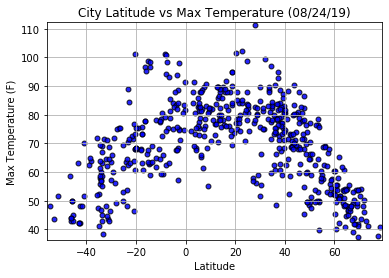

In [12]:
x_axis = weather_data_df['lat']
y_axis = weather_data_df['temp']
min_temp = weather_data_df['temp'].min()
max_temp = weather_data_df['temp'].max()
min_lat = weather_data_df['lat'].min()
max_lat = weather_data_df['lat'].max()

#print(x_axis)
#print(y_axis)
#print(min_temp)
#print(max_temp)
#print(min_lat)
#print(max_lat)

plt.scatter(x_axis, y_axis, marker="o", facecolor="blue", 
            edgecolor="black", alpha=0.85, s=24)
plt.grid()
plt.title("City Latitude vs Max Temperature (08/24/19)")
x_label = "Latitude"
y_label = "Max Temperature (F)"
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.xlim(min_lat-1, max_lat+1)
plt.ylim(min_temp-1, max_temp+1)

plt.savefig("Images/WeatherPy_Lat_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

min humidty 10
max humidity 100
min lat -54.81
max lat 78.22


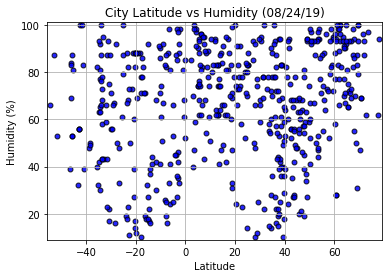

In [13]:
x_axis = weather_data_df['lat']
y_axis = weather_data_df['humidity']
min_humidity = weather_data_df['humidity'].min()
max_humidity = weather_data_df['humidity'].max()
min_lat = weather_data_df['lat'].min()
max_lat = weather_data_df['lat'].max()

#print(x_axis)
#print(y_axis)
print("min humidty", min_humidity)
print("max humidity", max_humidity)
print("min lat", min_lat)
print("max lat", max_lat)

plt.scatter(x_axis, y_axis, marker="o", facecolor="blue", 
            edgecolor="black", alpha=0.85, s=24)
plt.grid()
plt.title("City Latitude vs Humidity (08/24/19)")
x_label = "Latitude"
y_label = "Humidity (%)"
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.xlim(min_lat-1, max_lat+1)
plt.ylim(min_humidity-1, max_humidity+1)

plt.savefig("Images/WeatherPy_Lat_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

min clouds 0
max clouds 100
min lat -54.81
max lat 78.22


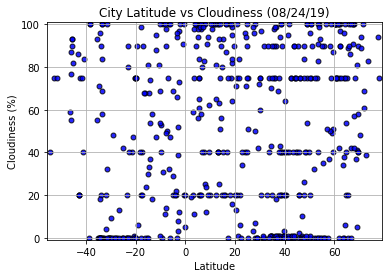

In [14]:
x_axis = weather_data_df['lat']
y_axis = weather_data_df['clouds']
min_clouds = weather_data_df['clouds'].min()
max_clouds = weather_data_df['clouds'].max()
min_lat = weather_data_df['lat'].min()
max_lat = weather_data_df['lat'].max()

#print(x_axis)
#print(y_axis)
print("min clouds", min_clouds)
print("max clouds", max_clouds)
print("min lat", min_lat)
print("max lat", max_lat)

plt.scatter(x_axis, y_axis, marker="o", facecolor="blue", 
            edgecolor="black", alpha=0.85, s=24)
plt.grid()
plt.title("City Latitude vs Cloudiness (08/24/19)")
x_label = "Latitude"
y_label = "Cloudiness (%)"
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.xlim(min_lat-1, max_lat+1)
plt.ylim(min_clouds-1, max_clouds+1)

plt.savefig("Images/WeatherPy_Lat_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

min wind 0.18
max wind 31.09
min lat -54.81
max lat 78.22


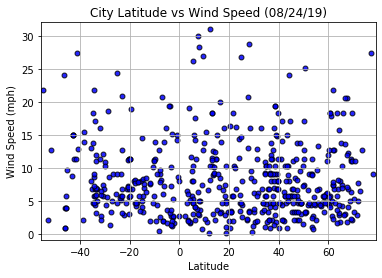

In [15]:
x_axis = weather_data_df['lat']
y_axis = weather_data_df['wind']
min_wind = weather_data_df['wind'].min()
max_wind = weather_data_df['wind'].max()
min_lat = weather_data_df['lat'].min()
max_lat = weather_data_df['lat'].max()

#print(x_axis)
#print(y_axis)
print("min wind", min_wind)
print("max wind", max_wind)
print("min lat", min_lat)
print("max lat", max_lat)

plt.scatter(x_axis, y_axis, marker="o", facecolor="blue", 
            edgecolor="black", alpha=0.85, s=24)
plt.grid()
plt.title("City Latitude vs Wind Speed (08/24/19)")
x_label = "Latitude"
y_label = "Wind Speed (mph)"
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.xlim(min_lat-1, max_lat+1)
plt.ylim(min_wind-1, max_wind+1)

plt.savefig("Images/WeatherPy_Lat_Wind.png")
plt.show()